# Tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, chi2

# Load the Preprocessed dataset

In [2]:
# Load datasets
df = pd.read_csv("preprocessed_dataset.csv")

# Features & Target
X = df.drop(columns=['num'])
y = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Feature Selection

1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables

* Feature Importance using **Random Forest** to rank variables

In [3]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Compute Feature importance scores
importances = rf.feature_importances_
feature_names = X.columns

# Rank features according to their scores
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

      Feature  Importance
3     thalach    0.118973
5          ca    0.094056
11       cp_4    0.088499
0         age    0.081739
22   thal_3.0    0.076238
24   thal_7.0    0.073501
2        chol    0.071549
1    trestbps    0.063583
4     oldpeak    0.057148
18    exang_1    0.039440
17    exang_0    0.038155
19    slope_1    0.030838
20    slope_2    0.028481
6       sex_0    0.025499
10       cp_3    0.019566
7       sex_1    0.015921
16  restecg_2    0.015764
8        cp_1    0.015729
14  restecg_0    0.014196
9        cp_2    0.008089
12      fbs_0    0.007325
13      fbs_1    0.006753
21    slope_3    0.005107
23   thal_6.0    0.003015
15  restecg_1    0.000837


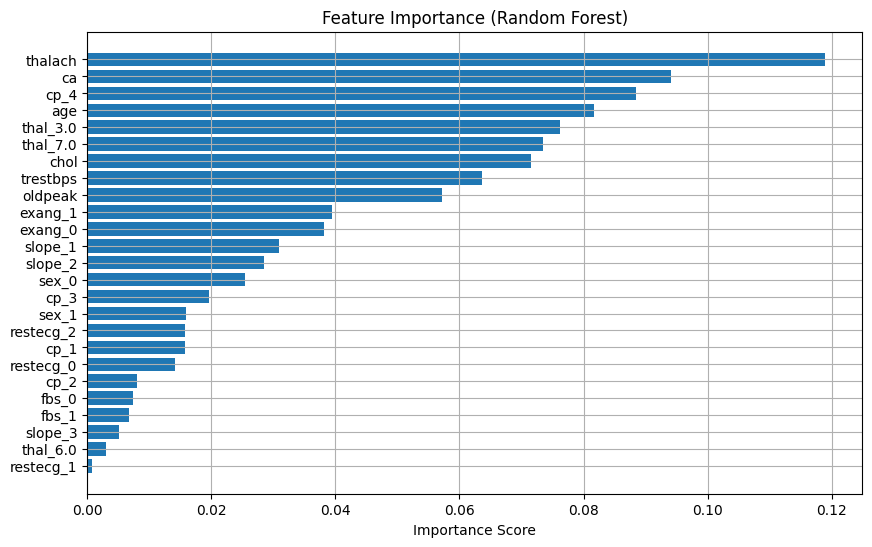

In [4]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.grid()
plt.show()

* Feature Importance using **XGBoost** to rank variables

In [5]:
# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb.fit(X, y)

# Compute Feature importance scores
importances = xgb.feature_importances_
feature_names = X.columns

feature_importance_df_xgb = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df_xgb)

      Feature  Importance
22   thal_3.0    0.299770
11       cp_4    0.165139
5          ca    0.068470
17    exang_0    0.061285
9        cp_2    0.048596
20    slope_2    0.046771
24   thal_7.0    0.040261
4     oldpeak    0.038000
6       sex_0    0.033028
19    slope_1    0.030717
10       cp_3    0.026513
0         age    0.024479
16  restecg_2    0.021204
14  restecg_0    0.020319
3     thalach    0.019346
1    trestbps    0.018614
2        chol    0.016821
12      fbs_0    0.014858
8        cp_1    0.005809
13      fbs_1    0.000000
15  restecg_1    0.000000
18    exang_1    0.000000
7       sex_1    0.000000
21    slope_3    0.000000
23   thal_6.0    0.000000


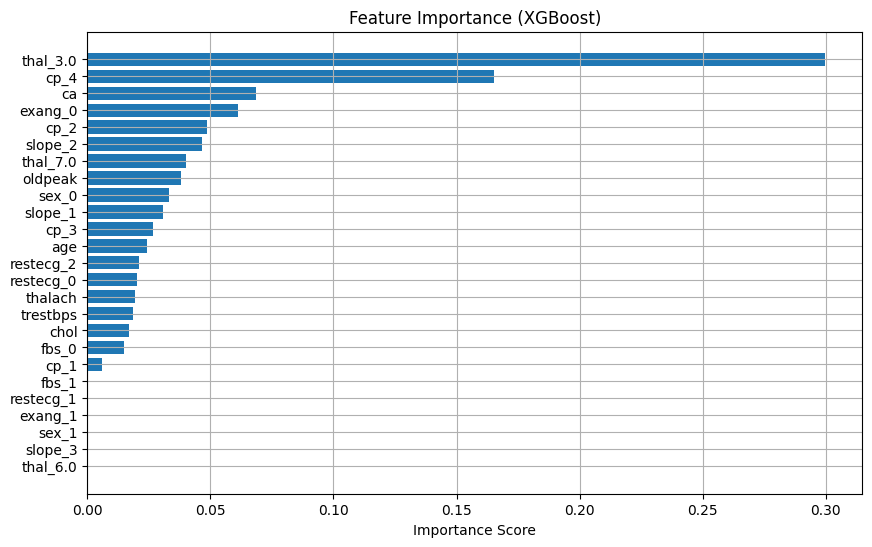

In [6]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df_xgb["Feature"], feature_importance_df_xgb["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance (XGBoost)")
plt.grid()
plt.show()

2. Apply Recursive Feature Elimination (RFE) to select the best predictors

* Using **Random Forest** as it performed well previously

In [7]:
# Choose a base model (e.x: RandomForest)
model_rf = rf

# Apply RFE to keep top 10 features
rfe = RFE(estimator=model_rf, n_features_to_select=10, step=1)
rfe = rfe.fit(X, y)

# Get selected features
rfe_features_rf = X.columns[rfe.support_]

print("Selected Features using RFE on Random Forest model:", rfe_features_rf.tolist())

Selected Features using RFE on Random Forest model: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_4', 'exang_0', 'thal_3.0', 'thal_7.0']


3. Chi-Square Test to check feature significance 

In [8]:
# Chi^2 requires non-negative features, so scale features to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square test (e.x: keep top 10 features)
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2  = chi2_selector.fit(X_scaled, y)

# Get Chi-Square scores
chi2_features = X.columns[chi2_selector.get_support()]
chi2_scores = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_selector.scores_}).sort_values(by="Chi2 Score", ascending=False)

print("Chi-Square Feature Significance:\n", chi2_scores)
print("\nFeatures selected by Chi-Square Test:", chi2_features.tolist())

Chi-Square Feature Significance:
       Feature  Chi2 Score
24   thal_7.0   42.958360
11       cp_4   42.410097
18    exang_1   38.052613
22   thal_3.0   36.592219
5          ca   28.038394
19    slope_1   24.086540
10       cp_3   21.551109
20    slope_2   20.624160
17    exang_0   18.466709
6       sex_0   15.785218
9        cp_2   15.646367
4     oldpeak   13.210143
7       sex_1    7.432845
14  restecg_0    4.697130
16  restecg_2    3.987845
23   thal_6.0    3.133971
3     thalach    2.670638
8        cp_1    2.208198
15  restecg_1    1.366567
21    slope_3    1.073891
0         age    1.005896
1    trestbps    0.532647
13      fbs_1    0.164669
2        chol    0.111079
12      fbs_0    0.028721

Features selected by Chi-Square Test: ['ca', 'sex_0', 'cp_3', 'cp_4', 'exang_0', 'exang_1', 'slope_1', 'slope_2', 'thal_3.0', 'thal_7.0']


4. Final Relevant Features to be selected for modelling
* Trial and error process to reach the best predictors to continue with into the next phase

In [9]:
# Union (all important ones) or intersection (only common ones)
final_features_rf = set(rfe_features_rf).union(set(chi2_features))   
X_final = X[list(final_features_rf)]
print("Final selected features (if used Random Forest):", final_features_rf)

Final selected features (if used Random Forest): {'sex_0', 'trestbps', 'thalach', 'ca', 'age', 'cp_3', 'oldpeak', 'slope_2', 'exang_0', 'chol', 'thal_3.0', 'slope_1', 'cp_4', 'exang_1', 'thal_7.0'}


# Dataset ready for modelling

In [10]:
final_features = final_features_rf

df_selected = X[list(final_features)].copy()  # make a copy of selected features
df_selected["target"] = y.values  # add target column from y label = 'num'

df_selected.to_csv("heart_diseases_final.csv", index=False)
print("✅Final dataset after feature selection saved as 'heart_diseases_final.csv'!")

✅Final dataset after feature selection saved as 'heart_diseases_final.csv'!
